In [42]:
from spec_id import Likelihood_contours,Median_w_Error,Highest_likelihood_model_JWST,Scale_model
from scipy.interpolate import interp1d
from scipy.ndimage import filters
from matplotlib import gridspec
from glob import glob
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
sea.set(style='white')
sea.set(style='ticks')
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [3]:
age = np.arange(0.5,2.1,0.1)
metal = np.arange(0.004,0.028,0.001)
tau = [0, 8.0, 8.48, 8.7, 8.85, 8.95, 9.04, 9.11, 9.18, 9.23, 9.28, 9.32, 9.36, 9.4, 9.43, 9.46]
M,A=np.meshgrid(metal,age)

In [4]:
Z,PZ = np.load('../chidat/z3.717_2_Z_pos.npy')
t,Pt = np.load('../chidat/z3.717_2_t_pos.npy')

(0.02, 0.003, 0.0019999999999999999999)
(1.0, 0.18399999999999999999, 0.056)


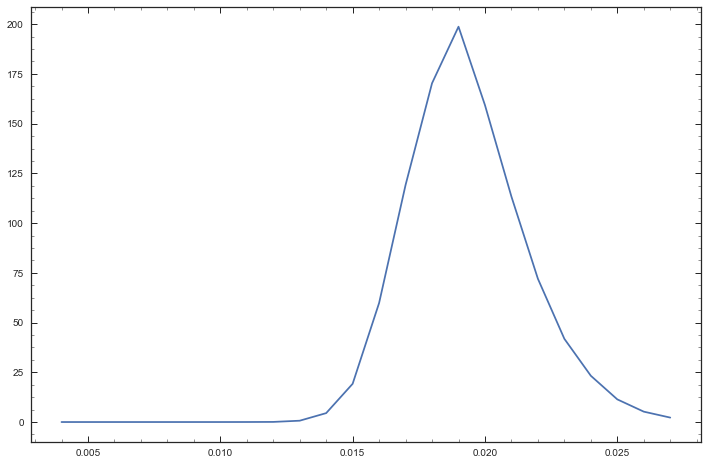

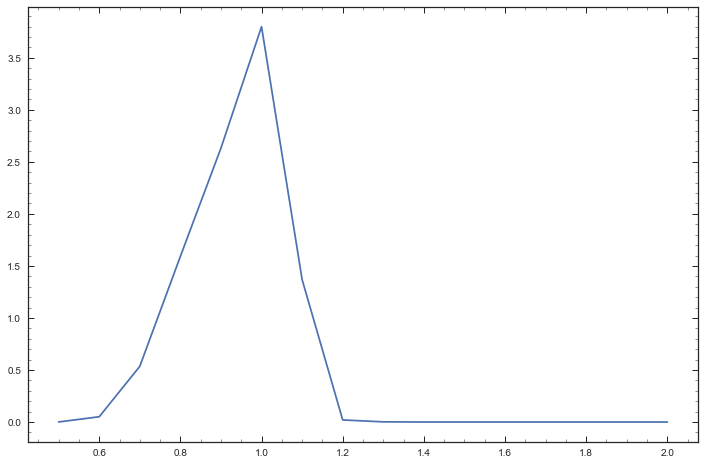

In [6]:
%matplotlib inline

plt.figure(figsize = [12,8])
plt.plot(Z,PZ)

plt.figure(figsize = [12,8])
plt.plot(t,Pt)

print Median_w_Error(PZ,Z)
print Median_w_Error(Pt,t)

In [7]:
###DATA
P = np.load('../chidat/z3.717_2_tZ_pos.npy')
Z,PZ = np.load('../chidat/z3.717_2_Z_pos.npy')
t,Pt = np.load('../chidat/z3.717_2_t_pos.npy')
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

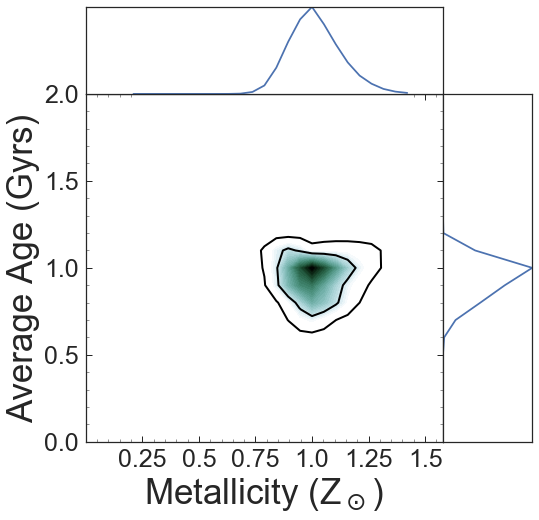

In [8]:
###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))

plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(Pt))

plt.show()
# plt.savefig('../plots/nirspec_sim_Lh_2.png')
plt.close()

In [9]:
bftau = Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.02,1.0,tau)

In [10]:
bftau

(0.02, 1.0, 8.0)

In [12]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data.npy')
mwv,mfl = np.load('../JWST/m0.02_a1.0_t8.0_nirspec.npy')

In [15]:
C = Scale_model(flx[wv<4.9],er[wv<4.9],mfl[wv<4.9])

In [ ]:
lowess = sm.nonparametric.lowess

In [ ]:
smwv,smfl=lowess(flx,wv[wv<4.9],frac=1/150.).T

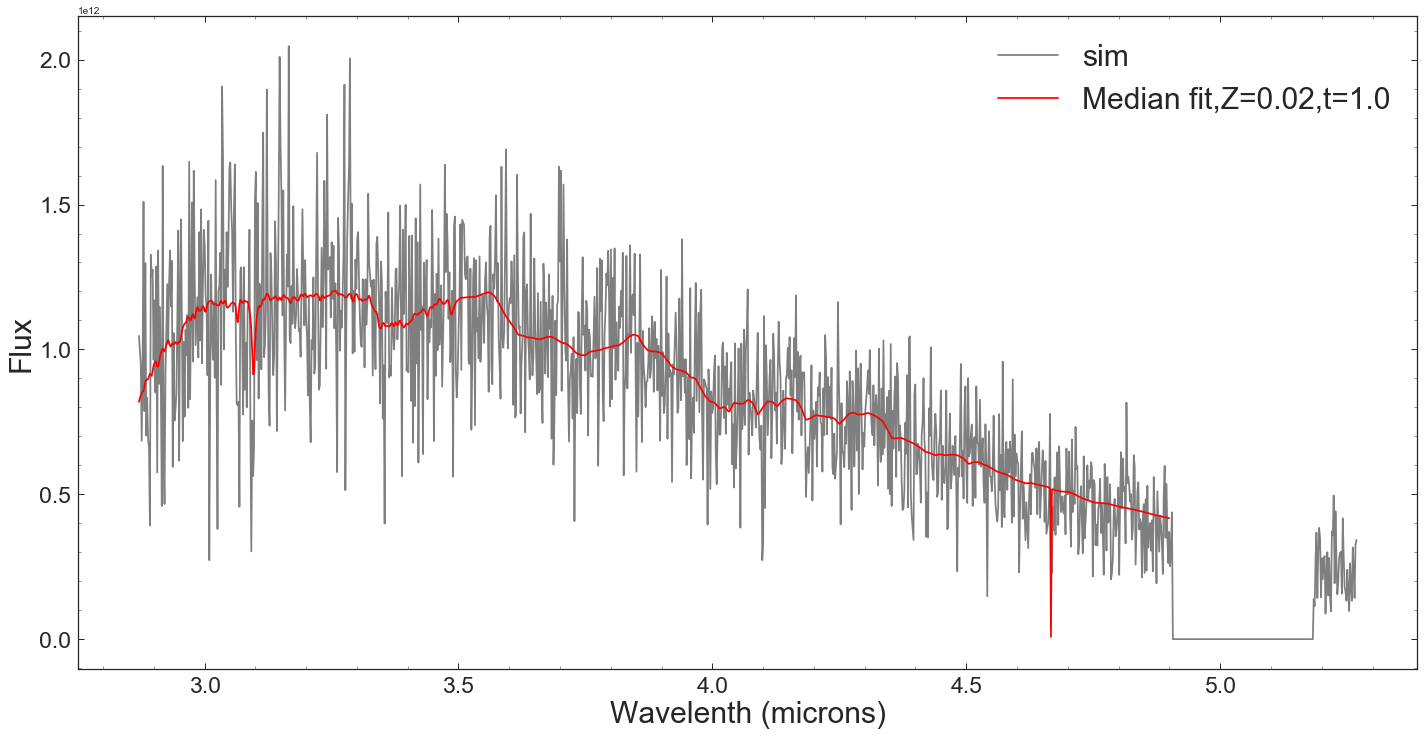

In [19]:
%matplotlib inline


plt.figure(figsize=[24,12])
plt.plot(wv,flx,color='k',alpha = .5,label = 'sim')
# plt.plot(smwv,smfl)
# plt.plot(wv,fl)
# plt.plot(wv[wv<4.9],er[wv<4.9], color='k',alpha = .5,label = 'sim error')
plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,'r',label='Median fit,Z=0.02,t=1.0')
# plt.xlim(2.875,4.9)
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
# plt.savefig('../plots/nirspec_sim_spec.png')

In [ ]:
mlist,alist = np.load('../mcerr/z3.717_2.npy')

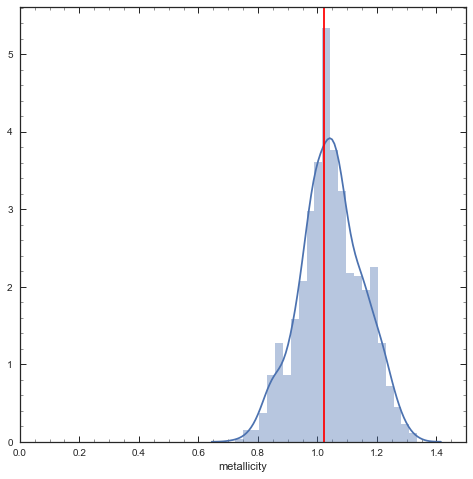

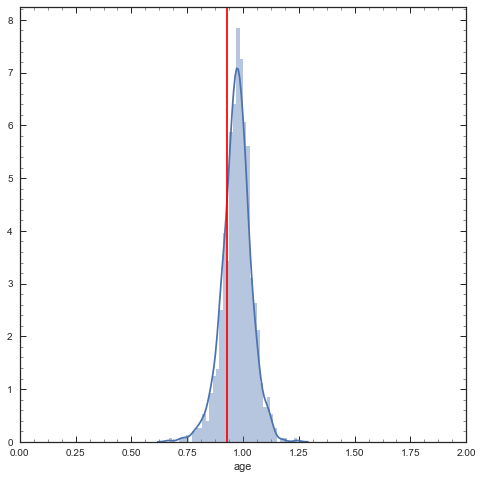

In [ ]:
%matplotlib inline

plt.figure(figsize=[8,8])
sea.distplot(mlist/.019)
plt.axvline(0.0194/.019,color= 'r')
plt.xlim(0,1.5)
plt.xlabel('metallicity')
plt.savefig('../plots/nirspec_zdist.png')

plt.figure(figsize=[8,8])
sea.distplot(alist)
plt.axvline(0.93,color= 'r')
plt.xlim(0,2)
plt.xlabel('age')
plt.savefig('../plots/nirspec_tdist.png')

In [25]:
print np.array([metal/0.019,metal,range(len(metal))]).T

[[  2.10526316e-01   4.00000000e-03   0.00000000e+00]
 [  2.63157895e-01   5.00000000e-03   1.00000000e+00]
 [  3.15789474e-01   6.00000000e-03   2.00000000e+00]
 [  3.68421053e-01   7.00000000e-03   3.00000000e+00]
 [  4.21052632e-01   8.00000000e-03   4.00000000e+00]
 [  4.73684211e-01   9.00000000e-03   5.00000000e+00]
 [  5.26315789e-01   1.00000000e-02   6.00000000e+00]
 [  5.78947368e-01   1.10000000e-02   7.00000000e+00]
 [  6.31578947e-01   1.20000000e-02   8.00000000e+00]
 [  6.84210526e-01   1.30000000e-02   9.00000000e+00]
 [  7.36842105e-01   1.40000000e-02   1.00000000e+01]
 [  7.89473684e-01   1.50000000e-02   1.10000000e+01]
 [  8.42105263e-01   1.60000000e-02   1.20000000e+01]
 [  8.94736842e-01   1.70000000e-02   1.30000000e+01]
 [  9.47368421e-01   1.80000000e-02   1.40000000e+01]
 [  1.00000000e+00   1.90000000e-02   1.50000000e+01]
 [  1.05263158e+00   2.00000000e-02   1.60000000e+01]
 [  1.10526316e+00   2.10000000e-02   1.70000000e+01]
 [  1.15789474e+00   2.20000

In [32]:
P150 = P.T[23] / np.trapz(P.T[23],age)
P50 = P.T[6] / np.trapz(P.T[6],age)

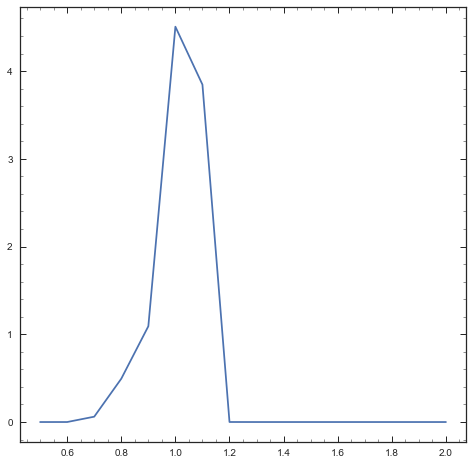

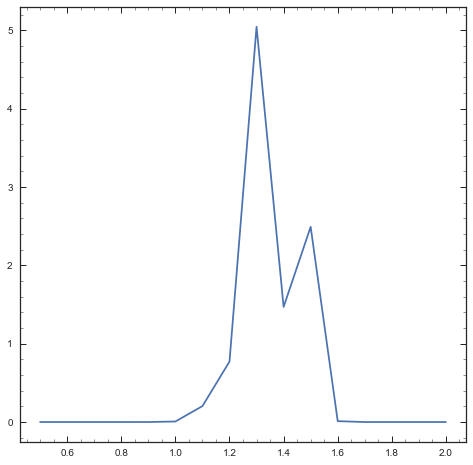

In [33]:
plt.figure(figsize=[8,8])
plt.plot(age,P150)

plt.figure(figsize=[8,8])
plt.plot(age,P50)

In [35]:
print Median_w_Error(P50,age)
print Median_w_Error(P150,age)
print Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.01,1.4,tau)
print Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.027,1.1,tau)

(1.3999999999999999, 0.14499999999999999, 0.085999999999999993)
(1.1000000000000001, 0.16700000000000001, 0.01)
(0.01, 1.4, 8.0)
(0.027, 1.1, 8.48)


In [218]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data.npy')
mwv,mfl = np.load('../JWST/m0.02_a1.0_t8.0_nirspec.npy')
mwv,mfl50 = np.load('../JWST/m0.01_a1.4_t8.0_nirspec.npy')
mwv,mfl150 = np.load('../JWST/m0.027_a1.1_t8.48_nirspec.npy')
C = Scale_model(flx[wv<4.9],er[wv<4.9],mfl[wv<4.9])
C50 = Scale_model(flx[wv<4.9],er[wv<4.9],mfl50[wv<4.9])
C150 = Scale_model(flx[wv<4.9],er[wv<4.9],mfl150[wv<4.9])

In [67]:
smfl = filters.gaussian_filter1d(flx[wv<4.9],sigma=4)

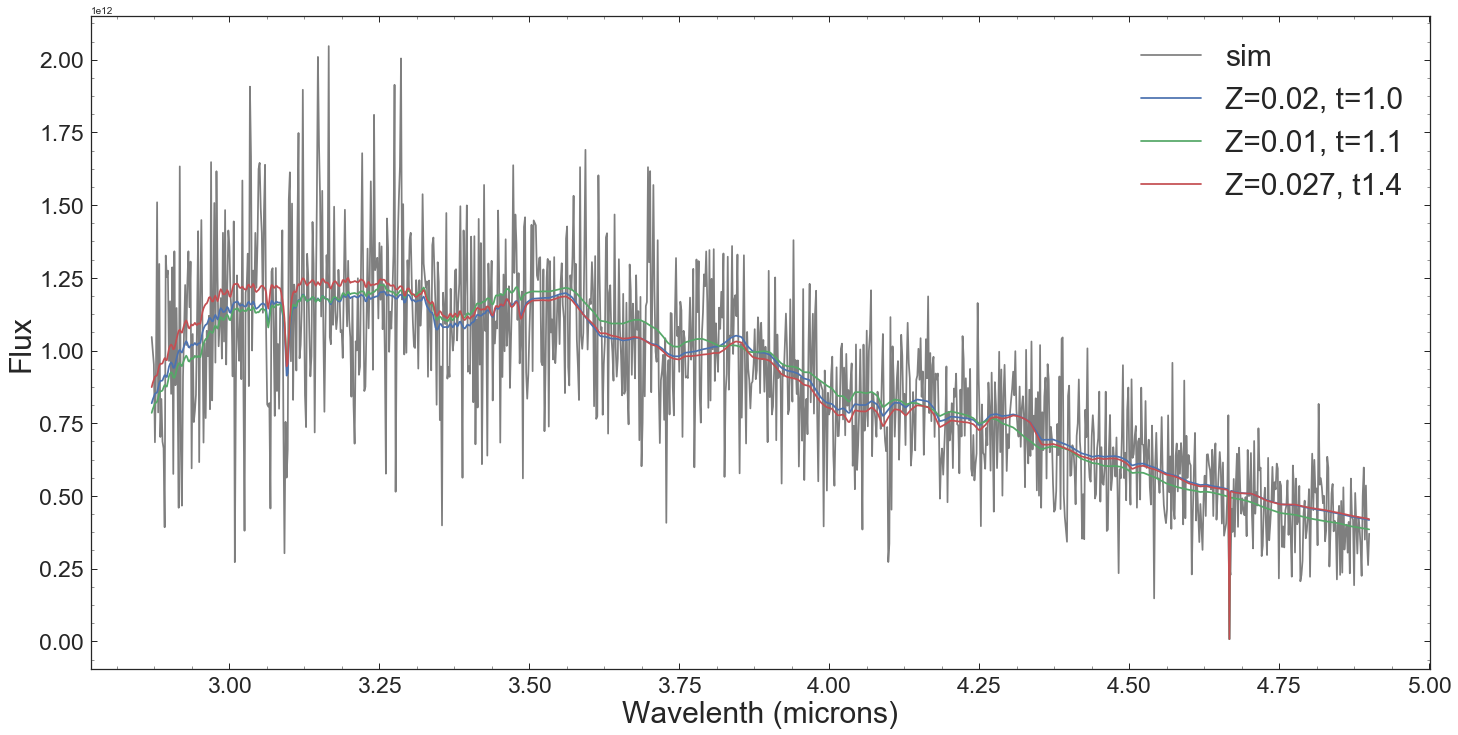

In [245]:
%matplotlib inline

plt.figure(figsize=[24,12])
plt.plot(wv[wv<4.9],flx[wv<4.9],color='k',alpha = .5,label = 'sim')
# plt.plot(wv[wv<4.9],smfl,color='k',alpha = .5,label = 'sim')
plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,label='Z=0.02, t=1.0')
plt.plot(mwv[wv<4.9],mfl50[wv<4.9]*C50,label='Z=0.01, t=1.1')
plt.plot(mwv[wv<4.9],mfl150[wv<4.9]*C150,label='Z=0.027, t1.4')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.show()
plt.close()

In [200]:
def smoothing(fl,h):
    kernal=-np.linspace(-1,1,h+3)**2+1

    sm = np.zeros(len(fl))
    for i in range(len(fl)):
        w = np.zeros(len(fl))
        for ii in range(len(kernal)):
            if ii + i - h + 1 >= 0 and ii + i - h + 1 < len(fl):
                w[ii + i - h + 1] = kernal[ii] 
        sm[i] = sum(fl[w != 0] * w[w != 0]) / sum(w[w != 0])
    return sm

In [243]:
smoothed_fl = smoothing(flx[wv<4.9],50)

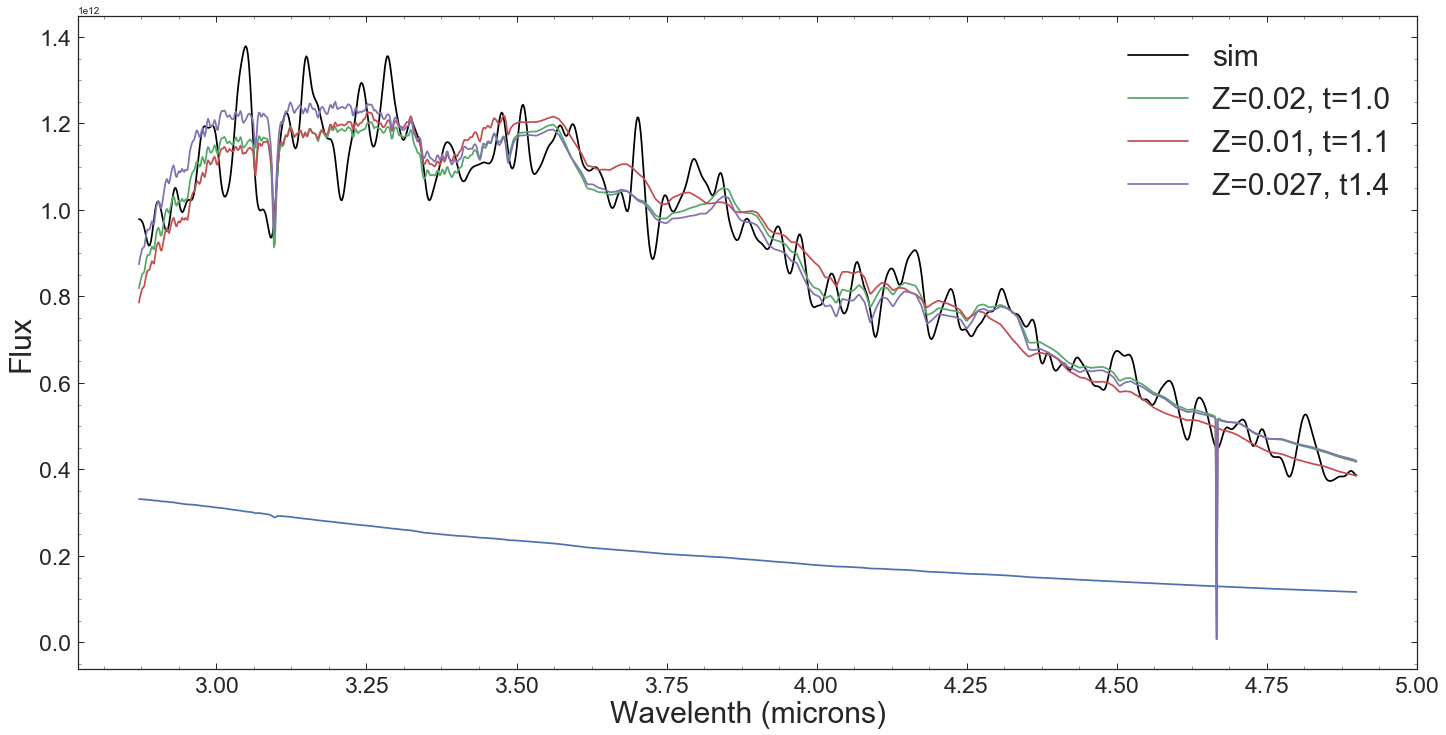

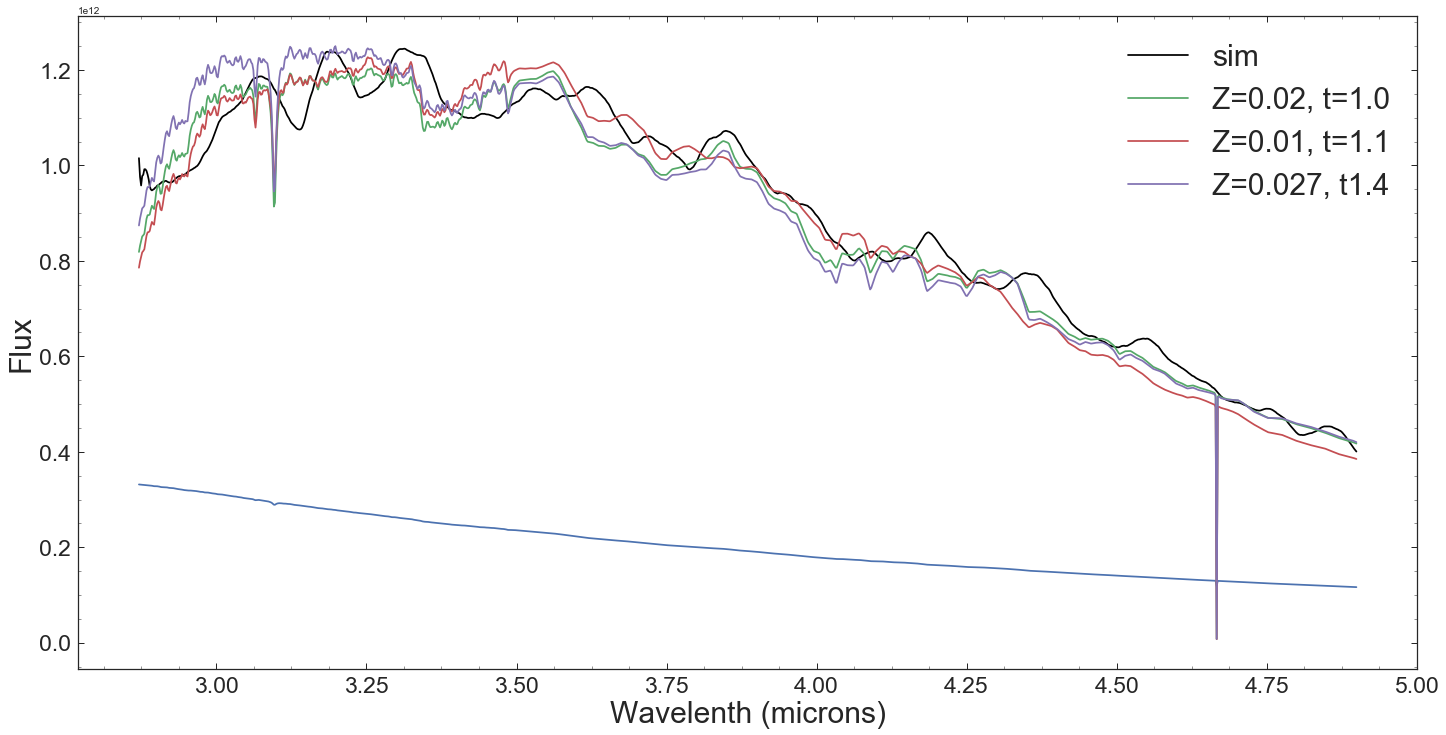

In [247]:
plt.figure(figsize=[24,12])
plt.plot(wv[wv<4.9],smfl,color='k',label = 'sim')
plt.plot(wv[wv<4.9],er[wv<4.9])
plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,label='Z=0.02, t=1.0')
plt.plot(mwv[wv<4.9],mfl50[wv<4.9]*C50,label='Z=0.01, t=1.1')
plt.plot(mwv[wv<4.9],mfl150[wv<4.9]*C150,label='Z=0.027, t1.4')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.show()
plt.close()

plt.figure(figsize=[24,12])
plt.plot(wv[wv<4.9],smoothed_fl,'k',label = 'sim')
plt.plot(wv[wv<4.9],er[wv<4.9])
plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,label='Z=0.02, t=1.0')
plt.plot(mwv[wv<4.9],mfl50[wv<4.9]*C50,label='Z=0.01, t=1.1')
plt.plot(mwv[wv<4.9],mfl150[wv<4.9]*C150,label='Z=0.027, t1.4')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.show()
plt.close()